# Data exploration using Non-parametric method


## Data Source: https://www.kaggle.com/datasets/camnugent/sandp500



## Data Description:
* Date - in format: yy-mm-dd
* Open - price of the stock at market open (this is NYSE data so all in USD)
* High - Highest price reached in the day
* Low Close - Lowest price reached in the day
* Volume - Number of shares traded
* Name - the stock's ticker name

# Importing the Python libraries

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset runtime environment

In [ ]:
df1=pd.read_csv("/content/AAPL_data.csv")
df1

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [ ]:
df2=pd.read_csv("/content/ABC_data.csv")
df2

,date,open,high,low,close,volume,Name
0,2013-02-08,46.52,46.895,46.4600,46.89,1232802,ABC
1,2013-02-11,46.85,47.000,46.5000,46.76,1115888,ABC
2,2013-02-12,46.70,47.050,46.6000,46.96,1318773,ABC
3,2013-02-13,46.74,46.900,46.6000,46.64,2645247,ABC
4,2013-02-14,46.67,46.990,46.6000,46.77,1941879,ABC
...,...,...,...,...,...,...,...
1254,2018-02-01,97.74,99.810,95.7300,99.29,2786798,ABC
1255,2018-02-02,99.09,99.090,95.9100,96.02,1660267,ABC
1256,2018-02-05,95.62,96.520,91.6900,91.90,2278534,ABC
1257,2018-02-06,92.58,93.370,86.9403,91.54,4574997,ABC


## Displaying the Columns in dataset 1 and 2

In [ ]:
print(f"Columns of data1 is: {df1.columns}")
print(f"Columns of data2 is:  {df2.columns}")

Columns of data1 is: Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')
Columns of data2 is:  Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')


# Information about both the datasets

In [ ]:
print(f"Displaying infomation about the data1:  {df1.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB
Displaying infomation about the data1:  None


In [ ]:
print(f"Displaying infomation about the data2:  {df2.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB
Displaying infomation about the data2:  None


## Checking for missing values for both the data-1 and data-2

In [ ]:
df1.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [ ]:
df2.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

# Univariate Analysis:
### For numerical variables:

### Calculating basic descriptive statistics

In [ ]:
print(f"Description of data-1 is: \n {df1.describe()}")

Description of data-1 is: 
               open         high          low        close        volume
count  1259.000000  1259.000000  1259.000000  1259.000000  1.259000e+03
mean    109.055429   109.951118   108.141589   109.066698  5.404790e+07
std      30.549220    30.686186    30.376224    30.556812  3.346835e+07
min      55.424200    57.085700    55.014200    55.789900  1.147592e+07
25%      84.647800    85.334950    84.250650    84.830650  2.969438e+07
50%     108.970000   110.030000   108.050000   109.010000  4.566893e+07
75%     127.335000   128.100000   126.290000   127.120000  6.870872e+07
max     179.370000   180.100000   178.250000   179.260000  2.668336e+08


In [ ]:
print(f"Description of data-2 is: \n {df2.describe()}")

Description of data-2 is: 
               open         high          low        close        volume
count  1259.000000  1259.000000  1259.000000  1259.000000  1.259000e+03
mean     82.066430    82.781774    81.349889    82.092979  2.005738e+06
std      16.333992    16.478889    16.153480    16.315690  1.124651e+06
min      46.380000    46.620000    46.080000    46.180000  3.932790e+05
25%      70.595000    70.950000    70.125000    70.525000  1.341366e+06
50%      82.550000    83.440000    81.420000    82.560000  1.762397e+06
75%      92.495000    93.370000    91.685000    92.520000  2.361994e+06
max     117.390000   120.680000   114.750000   115.480000  1.707164e+07


### Visualize the distribution using histograms, kernel density plots, or box plots.

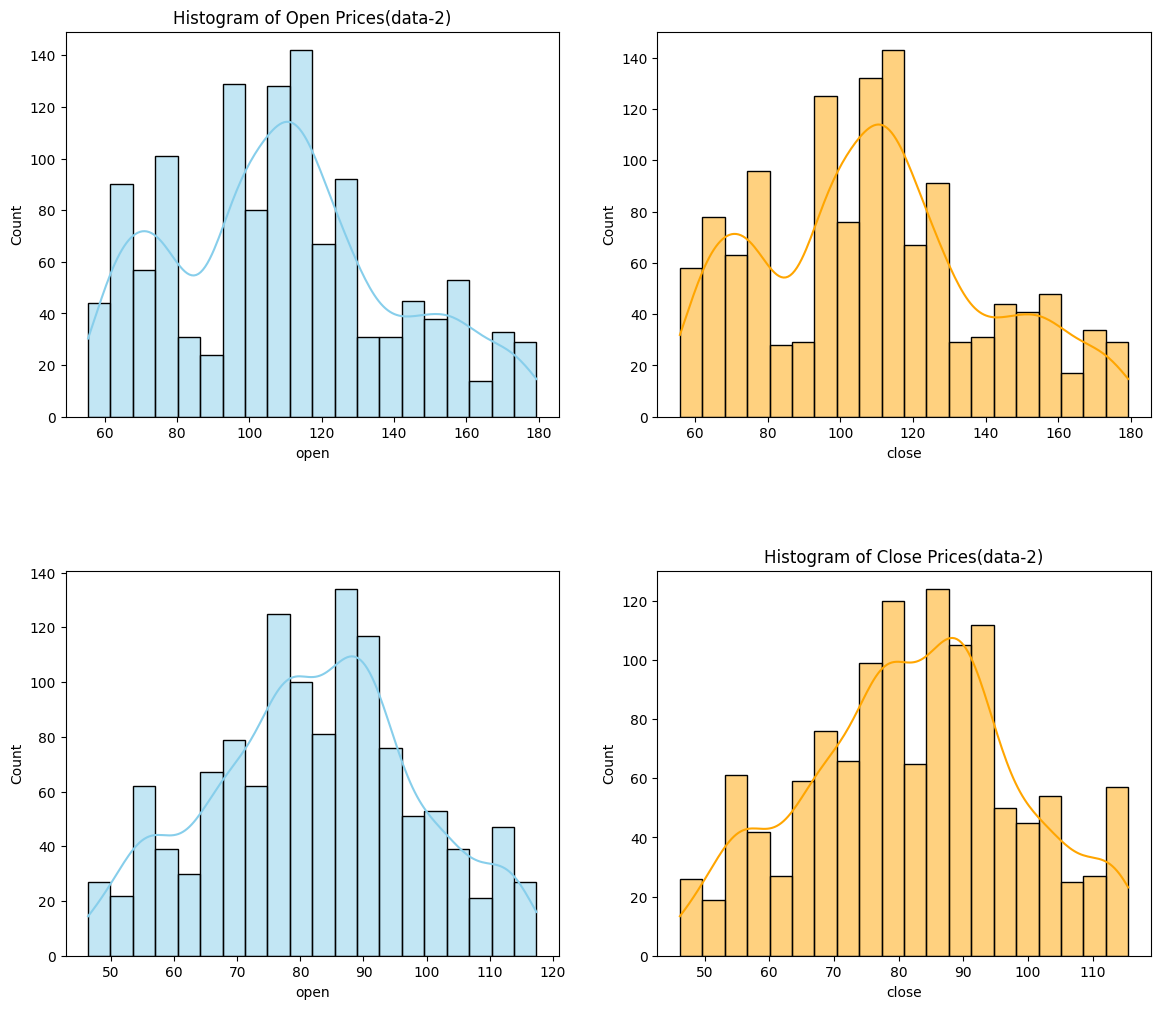

In [ ]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
plt.subplots_adjust(hspace=0.4)

# Histograms
sns.histplot(df1['open'], ax=axes[0, 0], kde=True, bins=20, color='skyblue')
axes[0, 0].set_title('Histogram of Open Prices(data-1)')

sns.histplot(df1['close'], ax=axes[0, 1], kde=True, bins=20, color='orange')
axes[1, 1].set_title('Histogram of Close Prices((data-1))')

# Histograms
sns.histplot(df2['open'], ax=axes[1, 0], kde=True, bins=20, color='skyblue')
axes[0, 0].set_title('Histogram of Open Prices(data-2)')

sns.histplot(df2['close'], ax=axes[1, 1], kde=True, bins=20, color='orange')
axes[1, 1].set_title('Histogram of Close Prices(data-2)')

# # Box plots
# sns.boxplot(df1['volume'], ax=axes[2, 0], color='purple')
# axes[2, 0].set_title('Box Plot of Volume')

# Hide the empty subplot
#axes[2, 1].axis('off')

plt.show()


### Box plot for Stock 1 and Stock 2

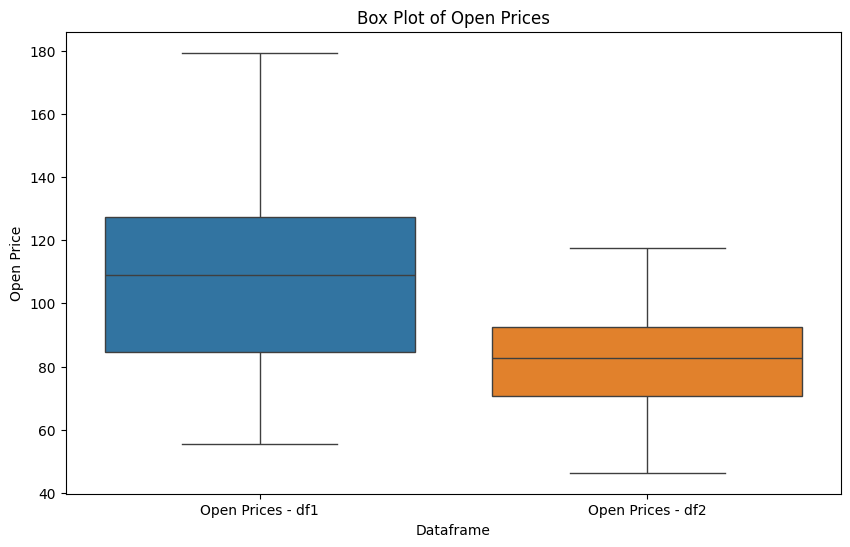

In [ ]:
# Combine 'open' prices from df1 and df2 into a single DataFrame
combined_df = pd.concat([df1['open'], df2['open']], axis=1)
combined_df.columns = ['Open Prices - df1', 'Open Prices - df2']

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df)
plt.title('Box Plot of Open Prices')
plt.ylabel('Open Price')
plt.xlabel('Dataframe')
plt.show()

* prices of stock 1 and stock 2 over the period of 5 years

## 5. Bivariate Analysis:

* Explore relationships between pairs of numerical variables using scatter plots
or pair plots.

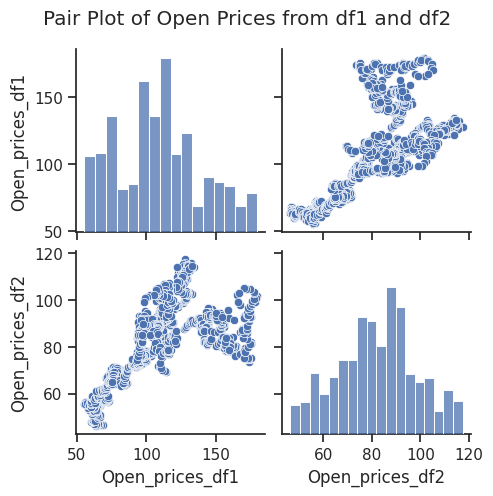

In [ ]:
combined_df.columns = ['Open_prices_df1', 'Open_prices_df2']

# Plotting pair plot with adjusted layout
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(combined_df)
plt.subplots_adjust(top=0.9)  # Adjust the top margin
g.fig.suptitle('Pair Plot of Open Prices from df1 and df2')
plt.show()

## Calculating correlation coefficients between numerical variables.

In [ ]:
num1=['open','close','volume']
num2=['open','close','volume']
# Calculate correlation coefficients for 'volume' index in df1
correlation_volume_df1 = df1[num1].corr()

# Calculate correlation coefficients for 'volume' index in df2
correlation_volume_df2 = df2[num2].corr()

print("Correlation Coefficient for 'Open', 'close' and 'volume' index in df1: \n", correlation_volume_df1)
print("\n")
print("Correlation Coefficient for 'Open', 'close' and 'volume' index in df2: \n", correlation_volume_df2)


Correlation Coefficient for 'Open', 'close' and 'volume' index in df1: 
             open     close    volume
open    1.000000  0.999118 -0.617862
close   0.999118  1.000000 -0.620290
volume -0.617862 -0.620290  1.000000


Correlation Coefficient for 'Open', 'close' and 'volume' index in df2: 
             open     close    volume
open    1.000000  0.998438 -0.048464
close   0.998438  1.000000 -0.052874
volume -0.048464 -0.052874  1.000000


## Interpretation of Correlation coefficient
* 1.0: Perfect Positive Correlation
* -1.0: Perfect Negative Correlation
* 0: No correlation

## 6. Non-parametric Methods:

### Spearman rank correlation for assessing monotonic relationships between numerical variables.

In [ ]:
from scipy.stats import spearmanr

# Calculate Spearman rank correlation coefficient for the 'volume' index in df1
spearman_corr_df1, p_value_df1 = spearmanr(df1['open'], df1['volume'])

# Calculate Spearman rank correlation coefficient for the 'volume' index in df2
spearman_corr_df2, p_value_df2 = spearmanr(df2['open'], df2['volume'])

print("Spearman rank correlation coefficient for df1:", spearman_corr_df1)
print("Spearman rank correlation coefficient for df2:", spearman_corr_df2)


Spearman rank correlation coefficient for df1: -0.6752798420122945
Spearman rank correlation coefficient for df2: -0.025179694856884437


## Mann-Whitney U test

### Assumption:
* Null Hypothesis: There is no significant difference between the distributions
* Alternate Hypothesis: There is significant difference between the distributions

In [ ]:
group1 = df1['open']
group2 = df2['open']

mann_whitney_test = stats.mannwhitneyu(group1, group2)
print("\nMann-Whitney U test result: ")
print("U statistic: ", mann_whitney_test.statistic)
print("p-value: ", mann_whitney_test.pvalue)

if mann_whitney_test.pvalue < 0.05:
    print("Mann-Whitney U test: Reject the null hypothesis, significant difference between the distributions.")
else:
    print("Mann-Whitney U test: Fail to reject the null hypothesis, no significant difference between the distributions.")



Mann-Whitney U test result: 
U statistic:  1216716.5
p-value:  1.2979908131852895e-119
Mann-Whitney U test: Reject the null hypothesis, significant difference between the distributions.


## Wilcoxon signed-rank test for paired samples.

### Assumption:
* Null Hypothesis: There is no significant difference between the paired samples.
* Alternate Hypothesis: There is significant difference between the paired samples.

In [ ]:
from scipy.stats import wilcoxon

data1 = df1['open']
data2 = df2['open']

# Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(data1, data2)

# Report results
print("Test statistic:", statistic)
print("p-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Wilcoxon signed-rank test: Reject the null hypothesis, significant difference between the paired samples.")
else:
    print("Wilcoxon signed-rank test: Fail to reject the null hypothesis, no significant difference between the paired samples.")



Test statistic: 34.0
p-value: 2.1201590233673385e-207
Wilcoxon signed-rank test: Reject the null hypothesis, significant difference between the paired samples.


## Friedman test for comparing multiple paired samples

In [ ]:
# df3=pd.read_csv("/content/ABBV_data.csv")
# df4=pd.read_csv("/content/financials.csv")


## Assumption:
* Null hypothesis: there is no statistically significant differences between the medians of the paired samples.
* Alternate hypotheis: there is statistically
significant differences between the medians of the paired samples.

In [ ]:
from scipy.stats import friedmanchisquare

df3=pd.read_csv("/content/ABBV_data.csv")
indexes = ['open', 'close', 'volume']

# Create a list to store the data for each index
data = []

# Populate the data list with the values from df1 and df2 for each index
for index in indexes:
   data.append([df1[index], df2[index], df3[index]])

statistic, p_value = friedmanchisquare(*data)
print("Friedman test statistic:", statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Friedman test: Reject the null hypothesis, significant difference between the medians of the paired samples.")
else:
    print("Friedman test: Fail to reject the null hypothesis, no significant difference between the median of the paired samples.")


Friedman test statistic: -198809286.88888887
p-value: 1.0
Friedman test: Fail to reject the null hypothesis, no significant difference between the median of the paired samples.


## Visualization

## Line Chart

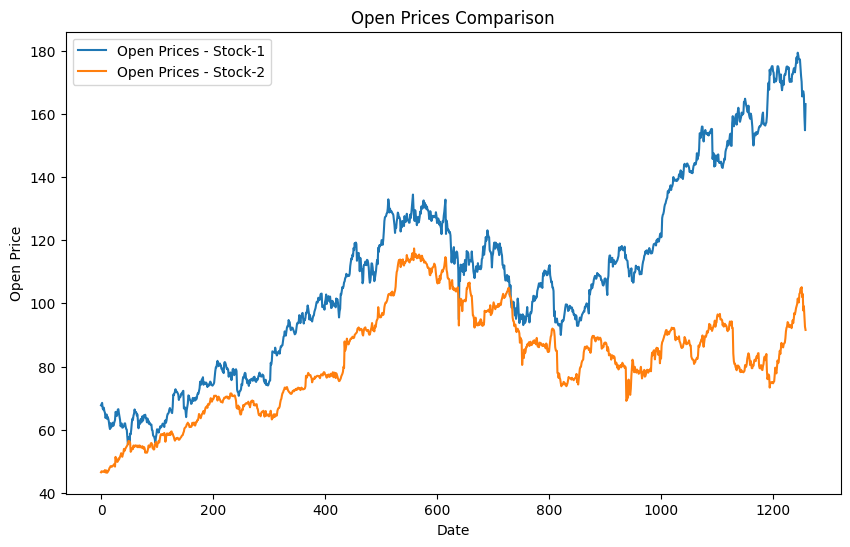

In [ ]:
# Extracting only the 'open' column from each dataframe
open_prices_df1 = df1['open']
open_prices_df2 = df2['open']

plt.figure(figsize=(10, 6))

# Plotting open prices from df1
plt.plot(open_prices_df1.index, open_prices_df1.values, label='Open Prices - Stock-1')

# Plotting open prices from df2
plt.plot(open_prices_df2.index, open_prices_df2.values, label='Open Prices - Stock-2')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Prices Comparison')
plt.legend()

# Showing the plot
plt.show()

## Histogram

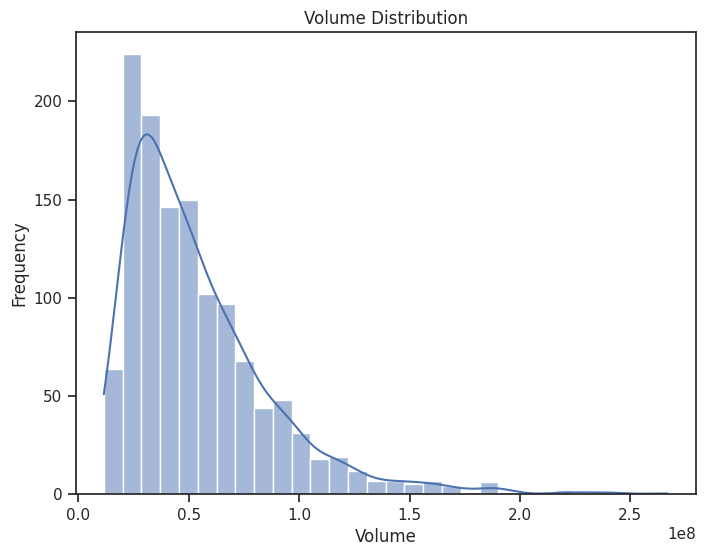

In [ ]:
# Histogram for 'volume'
plt.figure(figsize=(8, 6))
sns.histplot(df1['volume'], bins=30, kde=True)
plt.title('Volume Distribution')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

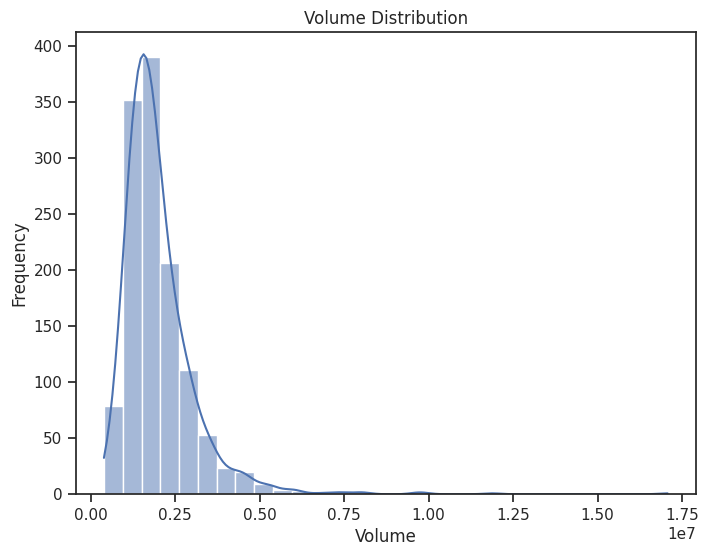

In [ ]:
# Histogram for 'volume'
plt.figure(figsize=(8, 6))
sns.histplot(df2['volume'], bins=30, kde=True)
plt.title('Volume Distribution')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()